In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("data/medical_insurance.csv", sep=",")
df = df.drop_duplicates()

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

le_smoker = LabelEncoder()
le_sex = LabelEncoder()
oh_region = OneHotEncoder(handle_unknown="ignore")

df["smoker"] = le_smoker.fit_transform(df["smoker"])
df["sex"] = le_sex.fit_transform(df["sex"])

# One hot encoding sur la colonne region
encoded_region = oh_region.fit_transform(df[["region"]])
encoded_region = pd.DataFrame(encoded_region.toarray(), columns=["northeast", "northwest", "southeast", "southwest"])
df.drop(columns=["region"], inplace=True)
df = pd.merge(df, encoded_region, left_index=True, right_index=True)

# ACP

In [5]:
x = df[["bmi", "age", "children"]]

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

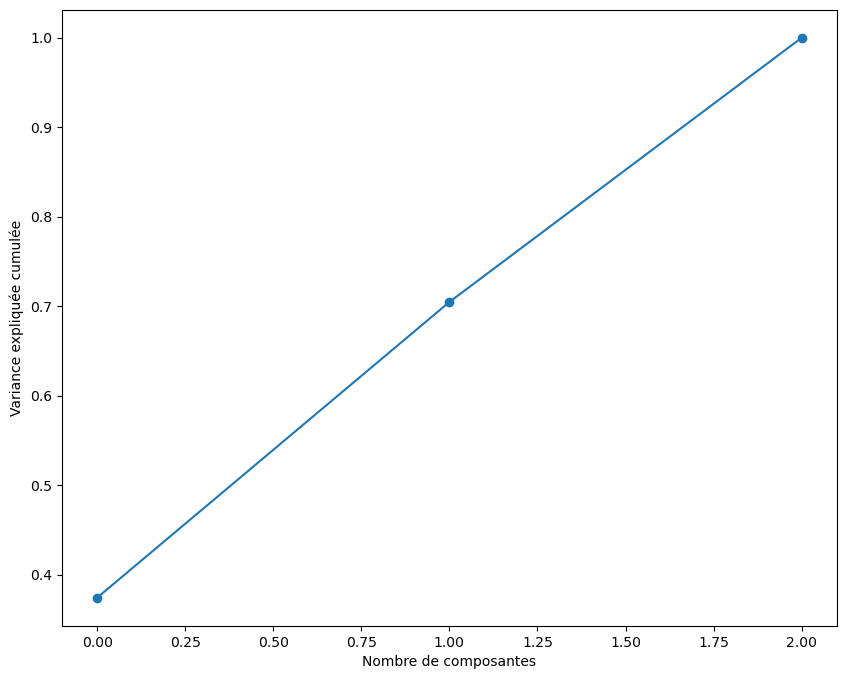

In [9]:
# Standardisation des données
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Application de l'ACP
pca = PCA()
pca.fit(x_scaled)

# Visualisation de la variance expliquée cumulée
plt.figure(figsize=(10, 8))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance expliquée cumulée')
plt.show()

# Transformation des données
x_pca = pca.transform(x_scaled)

<BarContainer object of 3 artists>

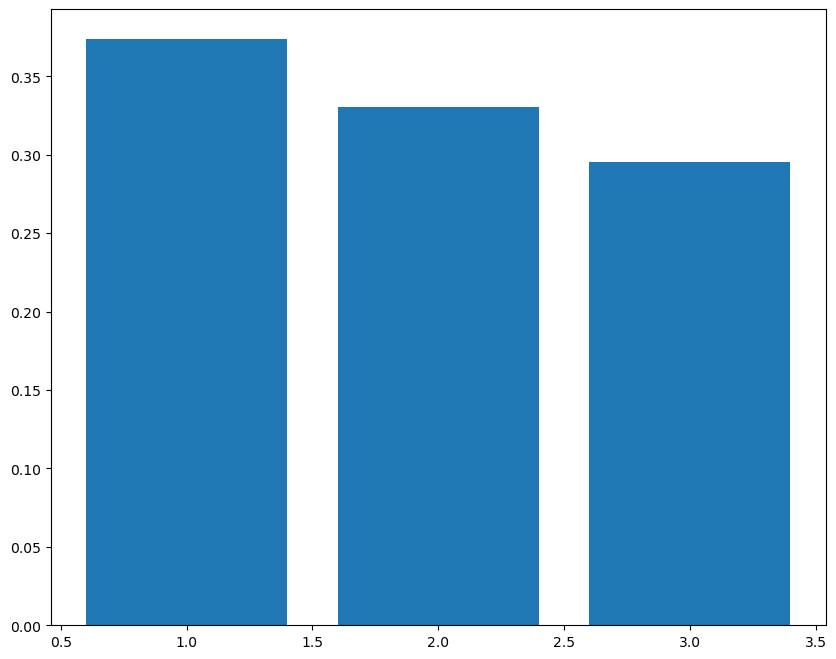

In [11]:
#hist variance expliquée

plt.figure(figsize=(10, 8))
plt.bar(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)